### Exercise 6: Build a PCA and t-SNE 
##### (15 points) --> your total will divided by 3 to get 5 points for this exercise.


---

In this Exercise, we will reinforce our knowledge of PCA and t-SNE using the Wine dataset.

##### 
**Dataset:**
You can find the dataset (win.data) under the datasets section on the Canvas.

**About Dataset**
The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of attributes regarding the chemical analysis of wine from Italy from three different producers, but the same type of wine for each producer. This information could be used as an example to verify the validity of a bottle of wine made from the grapes from a specific region in Italy. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.



To disable Python warnings

In [37]:
import warnings
warnings.filterwarnings("ignore")

### Step to do:

    1. Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn (1 point)

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

    2. Load the Wine dataset in datafram without header and display the first five rows of data. (1 point)

In [39]:
data = pd.read_csv('wine.data.csv')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


    3. The first column contains the labels; extract this column as labels and remove it from the dataset. (1 point)

In [60]:
# get labels
labels = data.iloc[:, 0]

# remove the column from the data
data = data.drop(data.columns[0], axis=1)



In [61]:
# check labels
print(labels)

0      13.20
1      13.16
2      14.37
3      13.24
4      14.20
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: 14.23, Length: 177, dtype: float64


In [62]:
# check the data remaining
data.sample(5)

,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
21,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
46,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
174,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
31,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


    4.Execute PCA to reduce the dataset to the first six components. (2 points)

In [63]:
# Initializing PCA with 6 components
pca = PCA(n_components=6) 

# Fitting and transforming the data using PCA
pca_data = pca.fit_transform(data) 

In [64]:
# check the components
pca.n_components

6

In [65]:
# the shape of the resulting daata
pca.transform(data).shape

(177, 6)

    5. Determine the amount of variance within the data described by these six components. (1 point)

In [66]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [9.98111291e-01 1.71939846e-03 9.49102137e-05 4.95589936e-05
 1.24067134e-05 8.27659129e-06]


In [67]:
# get explained variance ratio
pca.explained_variance_ratio_

array([9.98111291e-01, 1.71939846e-03, 9.49102137e-05, 4.95589936e-05,
       1.24067134e-05, 8.27659129e-06])

    6. Create a t-SNE model using a specified random state and a verbose value of 1 (1 point)

In [77]:
tsne = TSNE(random_state=42, verbose=1)

    7. Fit the data to the t-SNE model. (1 point)

In [78]:
tsne_data = tsne.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.001s...
[t-SNE] Computed neighbors for 177 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 52.442526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.404644
[t-SNE] KL divergence after 850 iterations: 0.104918


    8. Confirm that the shape of the t-SNE fitted data is two-dimensional ( 1 point)

In [79]:
print("Shape of t-SNE fitted data:", tsne_data.shape)

Shape of t-SNE fitted data: (177, 2)


In [80]:
# check resulting data components
tnse.embedding_.shape

(177, 2)

    9. Create a scatter plot of the two-dimensional data (first and second features) (2 points)

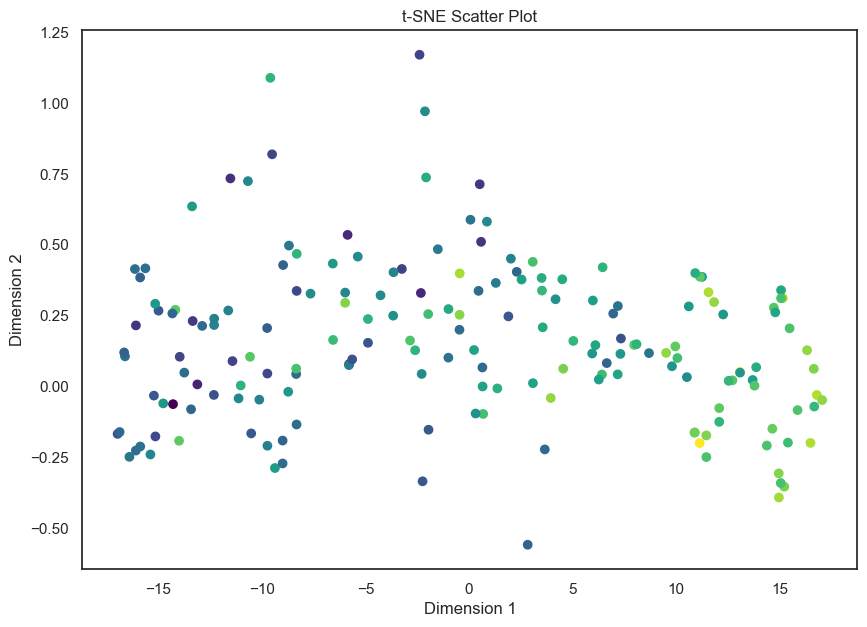

In [81]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

    10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present (2 points)

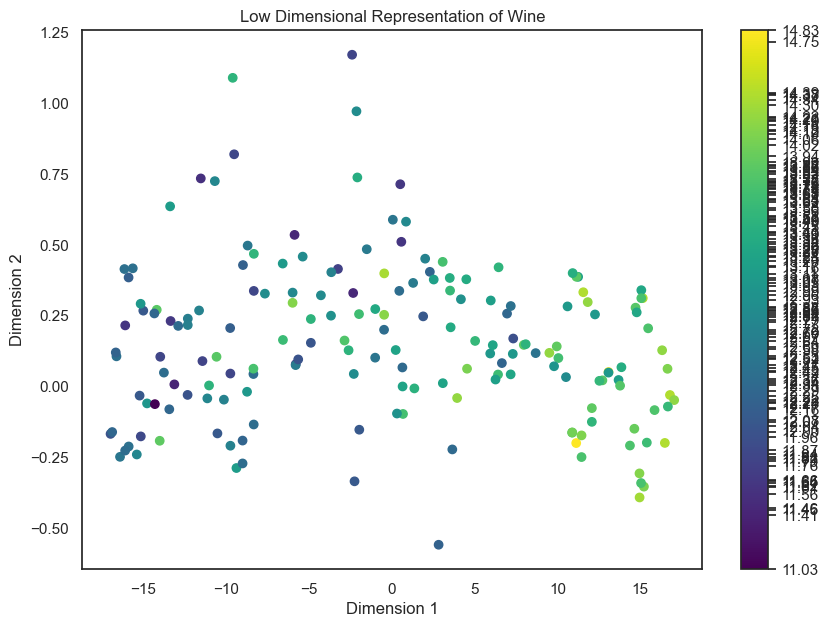

In [82]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:

# Create a scatter plot of the two-dimensional data (first and second features) with class labels

scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis')

# Add a colorbar for the class labels
plt.colorbar(scatter, ticks=np.unique(labels))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

    11. Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Note the effect of different perplexity values. (2 points)

IndexError: list index out of range

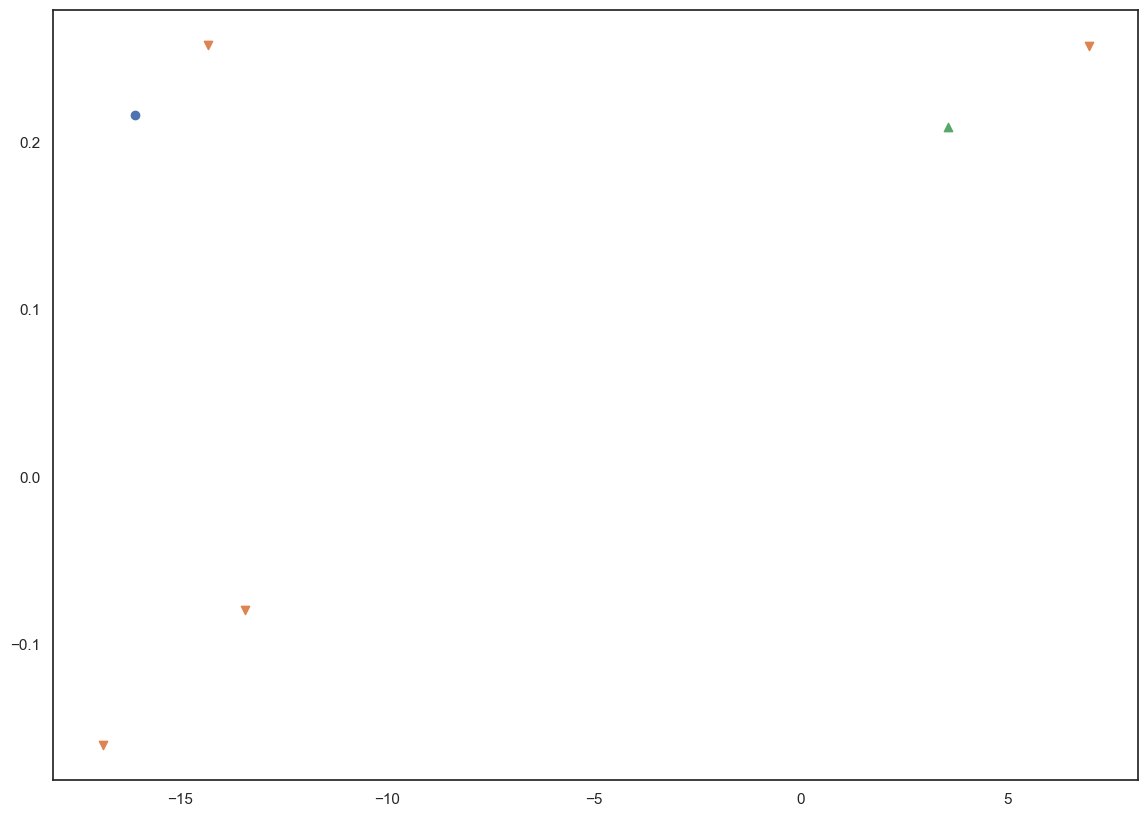

In [83]:
MARKER = ['o', 'v', '^',]
for perp in [1, 5, 20, 30, 80, 160, 320]:
## write your code here:

# Iterating through perplexity values

    # Create t-SNE model with current perplexity
    
    tsne = TSNE(perplexity=perp, random_state=42)

    # Fitting the data to the t-SNE model

    # Creating scatter plot with class labels and markers
    for i, label in enumerate(set(labels)):
        mask = labels == label
        plt.scatter(tsne_data[mask, 0], tsne_data[mask, 1], marker=MARKER[i], label=f'Class {label}')

    # Add labels and title
    plt.xlabel('Dimension 1', fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel('Dimension 2', fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.title(f't-SNE Scatter Plot with Perplexity {perp}', fontdict={"fontsize":15, "fontweight":5, "color":"brown"})

    # Add a legend
    plt.legend()

    # Display the plot
    
plt.show()

Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and identical number of iterations without progress values:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.001s...
[t-SNE] Computed neighbors for 177 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 52.442526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.404644
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 52.442526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.404644
[t-SNE] KL diverg

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 1000 iterations: 0.105039


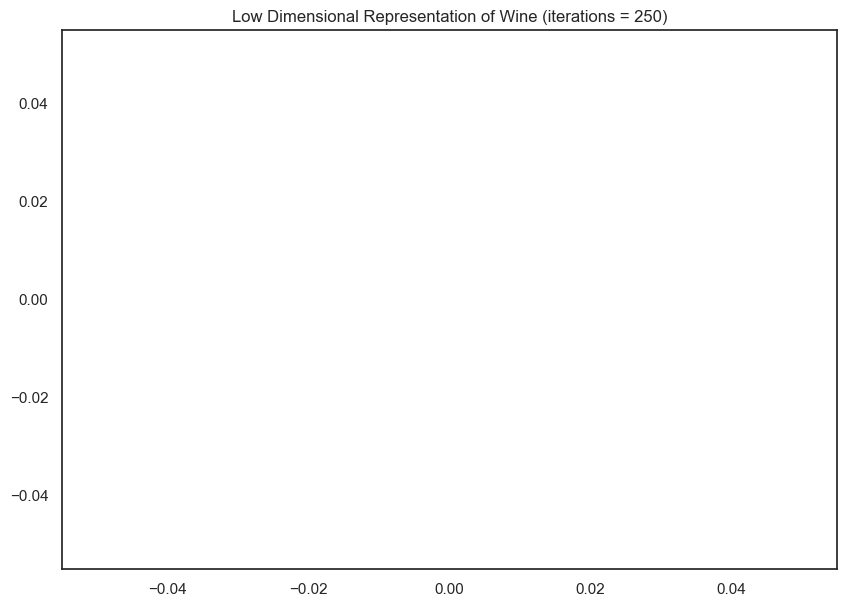

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


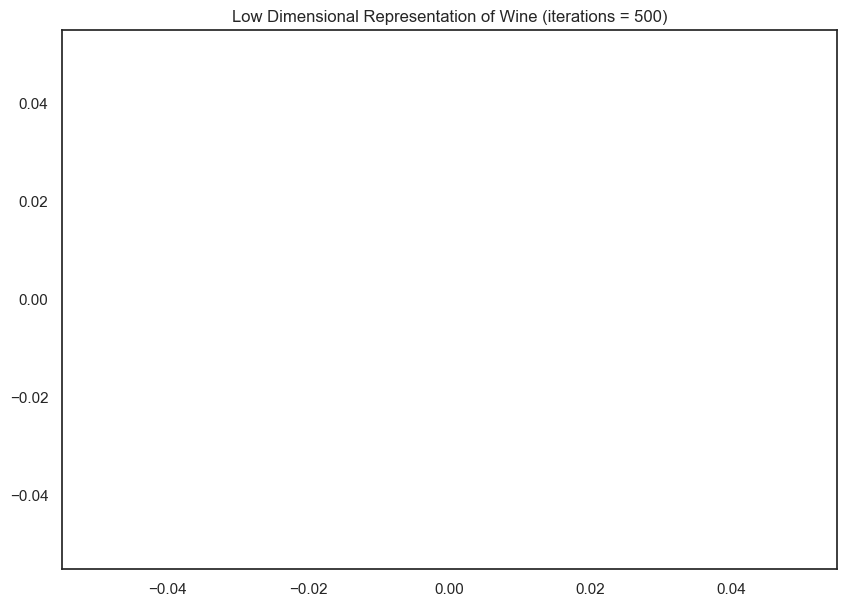

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


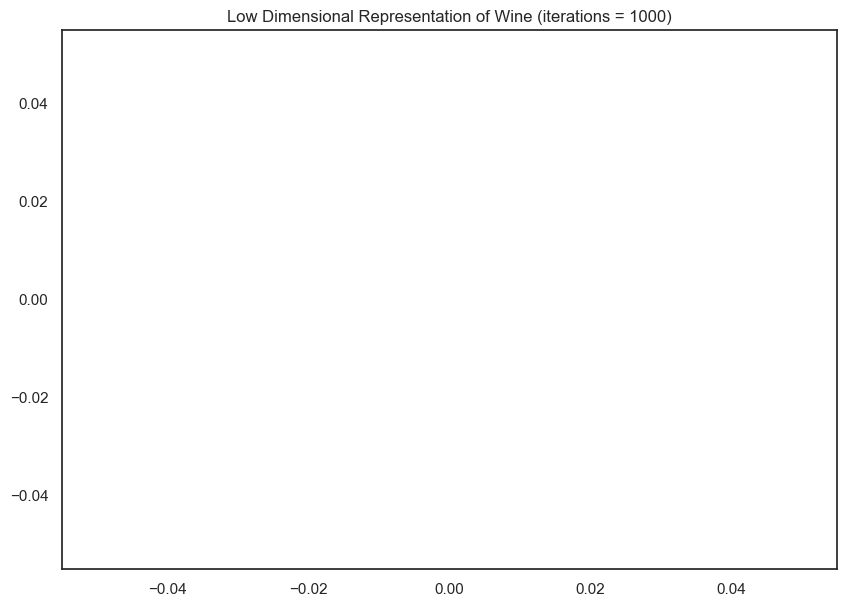

In [76]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(data)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (iterations = {iterations})');
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30}) 
plt.show()